In [1]:
import torch 
import torch.nn as nn 
from torch import sigmoid 
import matplotlib.pyplot as plt 
import numpy as np 
torch.manual_seed(1) 

In [3]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()

In [4]:
class Net(nn.Module): 
    def __init__(self, D_in, H, D_out): 
        """ 
        D_in: Input size
        H: Number of neurons in hidden layer 
        D_out: Output size
        """
        super(Net, self).__init__() 
        # Hidden Layer 
        self.linear1 = nn.Linear(D_in, H) 
        self.linear2 = nn.Linear(H, D_out) 
        self.a1 = None 
        self.l1 = None 
        self.l2 = None 

    def forward(self, x): 
        self.l1 = self.linear1(x)  # H1
        self.a1 = sigmoid(self.l1)  # Activation function for H1 
        self.l2 = self.linear2(self.a1)  # Output Layer 
        y_hat = sigmoid(self.linear2(self.a1))  # Output layer + Activation Function
        return y_hat

In [11]:
def train(Y, X, model, optimizer, criterion, epochs=100): 
    cost = [] 
    total = 0 
    for epoch in range(epochs): 
        total = 0 
        for y, x in zip(Y, X): 
            y_hat = model(x) 
            loss = criterion(y_hat, y) 
            loss.backward() 
            optimizer.step() 
            optimizer.zero_grad() 
            total += loss.item() 
        cost.append(total) 
        if epoch % 300 == 0: 
            PlotStuff(X, Y, model, epoch, leg=True) 
            plt.show() 
            model(X) 
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1, 1)) 
            plt.title("activations")
            plt.show() 
    return cost

In [12]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0
Y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [13]:
def criterion_cross(outputs, labels): 
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

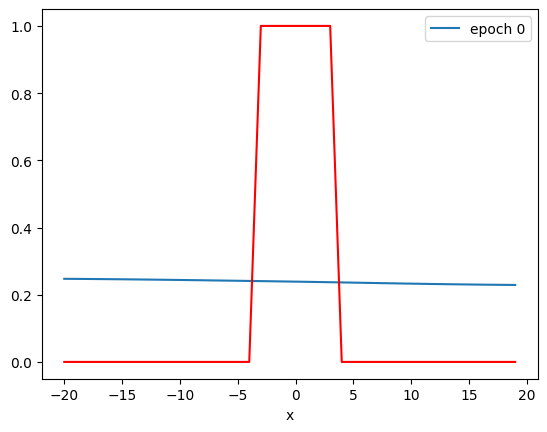

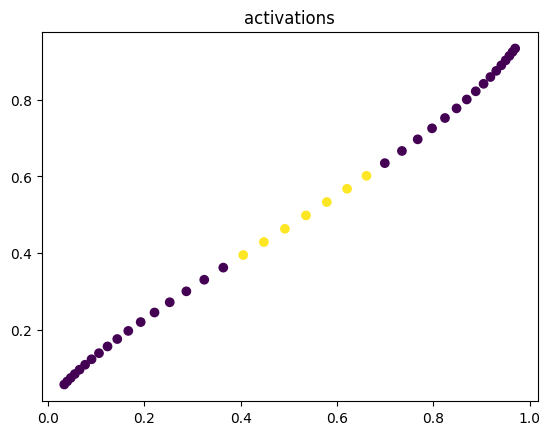

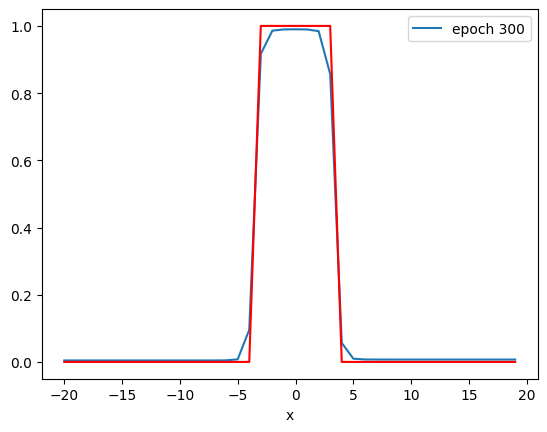

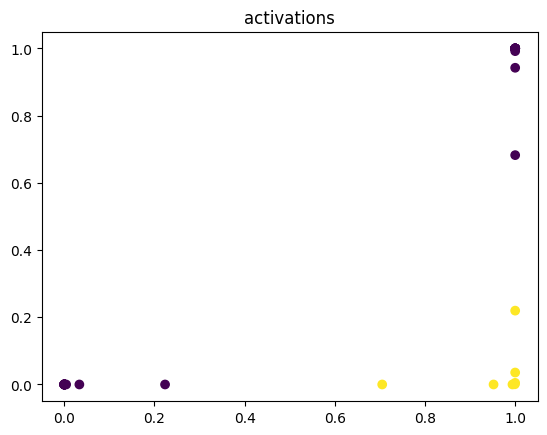

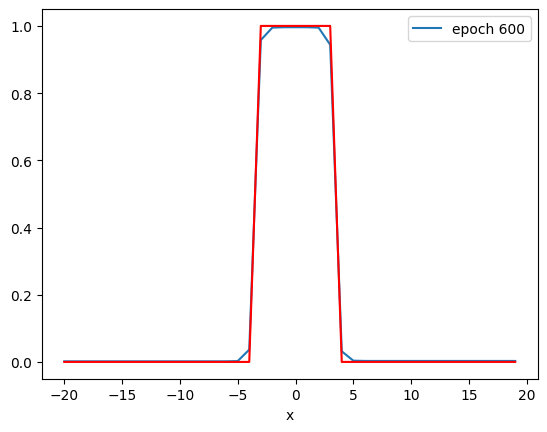

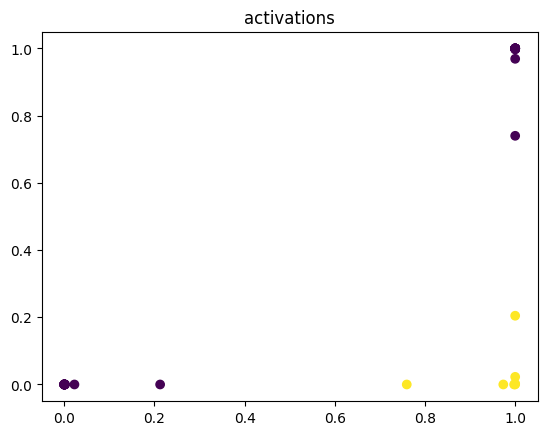

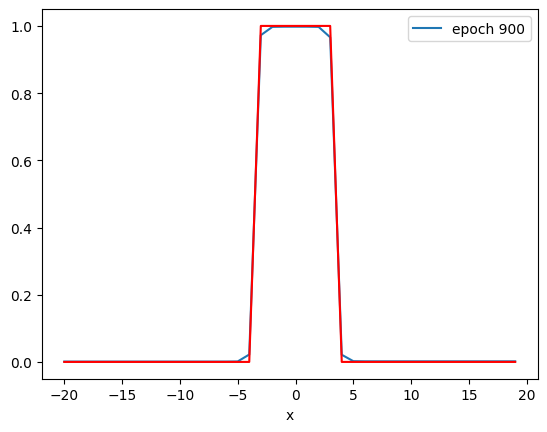

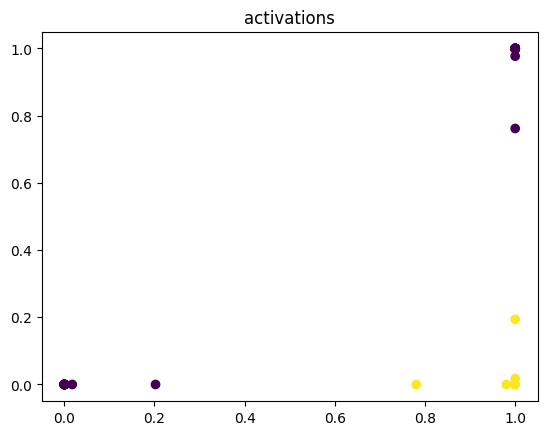

Text(0, 0.5, 'Cross Entropy Loss')

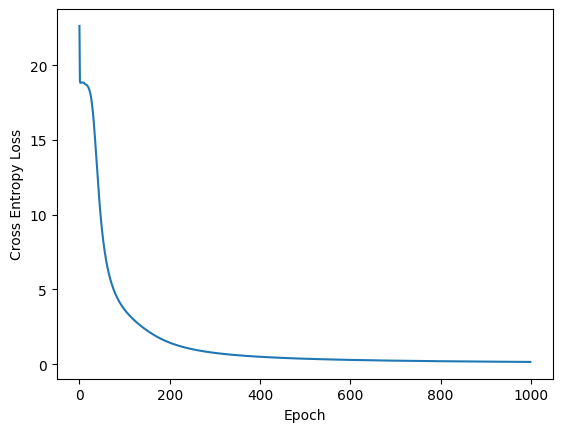

In [14]:
D_in = 1  # Input size
H = 2  # Num Hidden Layers 
D_out = 1  # Output Size
learning_rate = 0.1 
model = Net(D_in, H, D_out) 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000) 
plt.plot(cost_cross) 
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")

In [15]:
x = torch.tensor([0.0]) 
y_hat = model(x) 
y_hat

tensor([0.9980], grad_fn=<SigmoidBackward0>)

In [16]:
X = torch.tensor([[0.0], [2.0], [3.0]]) 
model(X)

tensor([[0.9980],
        [0.9975],
        [0.9702]], grad_fn=<SigmoidBackward0>)